In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
# Month translation used later.
month_to_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}
quarter_to_num = {'Qtr1':1, 'Qtr2':4, 'Qtr3':7, 'Qtr4':10}

In [2]:
%matplotlib inline

In [3]:
# Fetch list of excel files from Key.xlsx and parse to DataFrames.
# Warnings are safe to ignore.
keys = pd.read_excel('Key.xlsx')
eda_tables = []
for key in keys['File Name']:
        eda_tables.append(pd.read_excel(key, engine='openpyxl', header=11))

C:\Users\iamst\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\iamst\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\iamst\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\iamst\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\iamst\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains

In [4]:
# Melt dataframes -> Month Names become one column and values become another -> Use file name as value column header.
# Concatenate melted dataframes into one larger frame.
eda_df = pd.concat([eda_tables[x].iloc[:,0:13].melt(id_vars='Year',var_name='Month',value_name=keys.iloc[x]['File Name'].split('.')[0]) for x in range(0,len(keys))])

In [5]:
# Check data integrity
eda_df.head()

,Year,Month,All items,Food,Energy,Gas,Medical,Perscription,Shelter,Northeast,South,Midwest,West
0,1913.0,Jan,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914.0,Jan,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1915.0,Jan,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1916.0,Jan,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1917.0,Jan,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# High-level column stats | a CPI score of 100 = $1 in 1982-1984 money. Higher numbers = more expensive.
eda_df.describe()

,Year,All items,Food,Energy,Gas,Medical,Perscription,Shelter,Northeast,South,Midwest,West
count,10044.000000,1312.000000,1312.000000,784.000000,897.000000,952.000000,726.000000,833.000000,523.000000,523.000000,523.000000,523.000000
mean,1981.964158,83.994214,84.437928,109.014995,102.932138,164.666586,227.513661,135.697802,177.781195,164.378407,162.381820,172.732637
std,26.203417,81.739982,82.379375,74.978233,88.699644,163.209855,166.937366,99.208523,68.831484,61.174497,58.796599,67.388689
min,1913.000000,9.700000,9.400000,21.300000,12.400000,10.200000,37.100000,21.600000,33.600000,32.200000,32.900000,32.900000
25%,1965.000000,17.500000,17.000000,28.850000,24.900000,23.700000,55.075000,35.000000,129.550000,122.300000,122.250000,125.450000
50%,1984.000000,33.550000,34.300000,101.200000,92.100000,94.200000,209.900000,122.200000,179.800000,168.000000,168.800000,175.200000
75%,2003.000000,149.850000,146.950000,178.810000,139.700000,285.175000,367.042000,220.600000,241.628000,219.393500,215.393500,227.956000
max,2022.000000,289.109000,298.711000,298.469000,366.499000,541.515000,538.154000,348.389000,300.325000,279.879000,268.639000,307.145000


In [7]:
# Add datetime column for easier plotting.
# to_datetime requires a day so I went with the 1st of the month.
eda_df['Day'] = 1
# Convert text month abbreviations to numbers.
eda_df['Month'].replace(month_to_num, inplace=True)
eda_df['Datetime'] = pd.to_datetime(eda_df[['Year', 'Month', 'Day']])

<AxesSubplot:title={'center':'Inflation by Category'}, xlabel='Datetime', ylabel='Purchasing Power of $1'>

(4383.0, 18993.0)

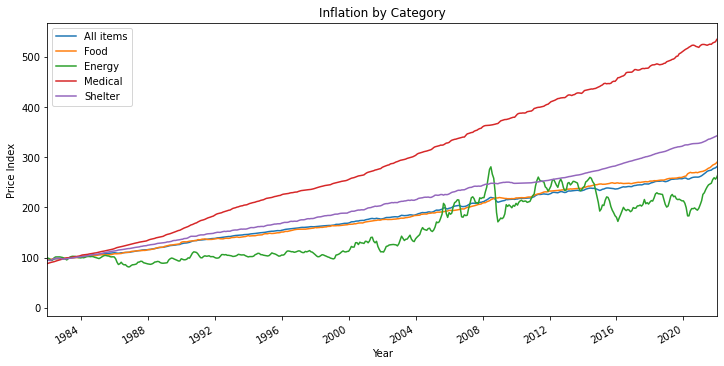

In [67]:
# Create graph space.
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)

# Plot some categories.
for cat in ['All items', 'Food', 'Energy', 'Medical', 'Shelter']:
    eda_df.dropna(subset=[cat])[['Datetime',cat]].plot(x='Datetime', y=cat, ax=ax)

# Labels
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Inflation by Category')

# Crop
plt.xlim('1/1/1982','1/1/2022')

(4383.0, 18993.0)

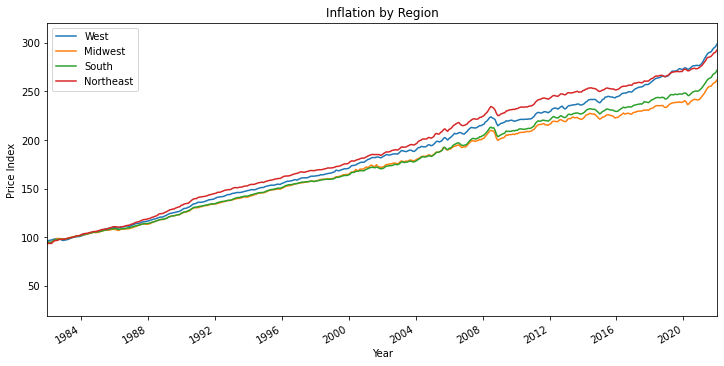

In [66]:
# Create graph space.
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)

# Plot some categories.
for cat in ['West', 'Midwest', 'South', 'Northeast']:
    eda_df.dropna(subset=[cat])[['Datetime',cat]].plot(x='Datetime', y=cat, ax=ax)

# Labels
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Inflation by Region')

# Crop
plt.xlim('1/1/1982','1/1/2022')